# 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lumina = pd.read_excel('lumina_sales.xlsx')

In [3]:
lumina.head()

,sales_date,customer_district_code,item_type,item_type_description,sales,business_chain_l1_name,business_chain_l1_code,business_area_code,light_source,salesperson_code
0,20191025.0,400.0,5.0,Landscape,3.33,Metro Electrical Distributors,MED,COM,Traditional,T612
1,20231013.0,200.0,5.0,Landscape,3.58,Aussie Energy Group,AEG,COM,Traditional,P345
2,20241011.0,200.0,5.0,Landscape,54.5,NextGen Electrical Solutions,NES,OTH,Traditional,P345
3,20191011.0,200.0,5.0,Landscape,26,Metro Electrical Distributors,MED,OTH,Traditional,T504
4,20211021.0,400.0,5.0,Landscape,46.1,Metro Electrical Distributors,MED,COM,Traditional,T504


In [4]:
lumina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037205 entries, 0 to 1037204
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sales_date              951128 non-null   float64
 1   customer_district_code  951177 non-null   float64
 2   item_type               951177 non-null   float64
 3   item_type_description   1037194 non-null  object 
 4   sales                   1036784 non-null  object 
 5   business_chain_l1_name  951177 non-null   object 
 6   business_chain_l1_code  951177 non-null   object 
 7   business_area_code      951177 non-null   object 
 8   light_source            951177 non-null   object 
 9   salesperson_code        1037188 non-null  object 
dtypes: float64(3), object(7)
memory usage: 79.1+ MB


In [5]:
lumina.shape

(1037205, 10)

# 2. Converting data type

In [6]:
lumina['sales_date'] = lumina['sales_date'].astype(str).str.replace('.0','',regex = False)
lumina['sales_date'] = pd.to_datetime(lumina['sales_date'],format = 'mixed', errors = 'coerce')
lumina['sales_year'] = lumina['sales_date'].dt.year
lumina['sales_month'] = lumina['sales_date'].dt.month

In [7]:
lumina['sales'] = pd.to_numeric(lumina['sales'], errors = 'coerce')
lumina['customer_district_code'] = lumina['customer_district_code'].astype(str).str.replace('.0','',regex = False)
lumina['item_type'] = lumina['item_type'].astype(str).str.replace('.0','',regex = False)

In [8]:
lumina.head()

,sales_date,customer_district_code,item_type,item_type_description,sales,business_chain_l1_name,business_chain_l1_code,business_area_code,light_source,salesperson_code,sales_year,sales_month
0,2019-10-25,400,5,Landscape,3.33,Metro Electrical Distributors,MED,COM,Traditional,T612,2019.0,10.0
1,2023-10-13,200,5,Landscape,3.58,Aussie Energy Group,AEG,COM,Traditional,P345,2023.0,10.0
2,2024-10-11,200,5,Landscape,54.50,NextGen Electrical Solutions,NES,OTH,Traditional,P345,2024.0,10.0
3,2019-10-11,200,5,Landscape,26.00,Metro Electrical Distributors,MED,OTH,Traditional,T504,2019.0,10.0
4,2021-10-21,400,5,Landscape,46.10,Metro Electrical Distributors,MED,COM,Traditional,T504,2021.0,10.0


In [9]:
lumina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037205 entries, 0 to 1037204
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   sales_date              951126 non-null   datetime64[ns]
 1   customer_district_code  1037205 non-null  object        
 2   item_type               1037205 non-null  object        
 3   item_type_description   1037194 non-null  object        
 4   sales                   1036781 non-null  float64       
 5   business_chain_l1_name  951177 non-null   object        
 6   business_chain_l1_code  951177 non-null   object        
 7   business_area_code      951177 non-null   object        
 8   light_source            951177 non-null   object        
 9   salesperson_code        1037188 non-null  object        
 10  sales_year              951126 non-null   float64       
 11  sales_month             951126 non-null   float64       
dtypes: datetime64[

# 3. Check unique values of each variables

In [10]:
for col in lumina.columns:
    print(lumina[col].unique())

<DatetimeArray>
['2019-10-25 00:00:00', '2023-10-13 00:00:00', '2024-10-11 00:00:00',
 '2019-10-11 00:00:00', '2021-10-21 00:00:00', '2021-10-28 00:00:00',
 '2021-10-06 00:00:00', '2024-10-07 00:00:00', '2022-10-10 00:00:00',
 '2021-10-26 00:00:00',
 ...
 '2014-10-22 00:00:00', '2015-10-23 00:00:00', '2028-01-05 00:00:00',
 '2028-01-02 00:00:00', '2028-01-03 00:00:00', '2027-01-03 00:00:00',
 '2027-01-05 00:00:00', '2015-10-16 00:00:00', '2018-10-27 00:00:00',
 '2020-10-31 00:00:00']
Length: 268, dtype: datetime64[ns]
['400' '200' '510' '500' '310' '300' '410' '210' '600' '720' '710' '535'
 '530' '540' '520' '545' '100' 'nan']
['5' '7' '6' '1' '4' '9' '8' '2' '3' 'nan']
['Landscape' 'Decorative' nan 'Healthcare' 'Wall-mount' 'Solar' 'Garage'
 'Road-and-street' 'Industrial' 'Pendants' 0]
[3.33000e+00 3.58000e+00 5.45000e+01 ... 1.95971e+04 4.27000e+02
 2.33290e+02]
['Metro Electrical Distributors' 'Aussie Energy Group'
 'NextGen Electrical Solutions' 'Independent Retailers Association'


# 4. Standardizing null values

In [11]:
lumina = lumina.replace(['na','NA','Na','nA',' ','','nan','Nan','none', 'None', 'NONE','?','--','nil', 'Nil', 'NIL'],np.nan)

In [12]:
lumina['business_chain_l1_code'] = lumina['business_chain_l1_code'].str.strip()
lumina['business_area_code'] = lumina['business_area_code'].str.strip()

# 5. Fix missing values

## Missing values having categorical data type

In [13]:
# Check amount of null values
lumina.isnull().sum()

sales_date                86079
customer_district_code    86028
item_type                 86028
item_type_description        11
sales                       424
business_chain_l1_name    86028
business_chain_l1_code    86028
business_area_code        89351
light_source              86028
salesperson_code             17
sales_year                86079
sales_month               86079
dtype: int64

In [14]:
lumina.groupby(['item_type'])['item_type_description'].unique()

item_type
1         [Wall-mount]
2         [Industrial]
3           [Pendants]
4              [Solar]
5     [Landscape, nan]
6         [Healthcare]
7    [Decorative, nan]
8    [Road-and-street]
9             [Garage]
Name: item_type_description, dtype: object

In [15]:
item_5_des = lumina.loc[lumina['item_type'] == '5', 'item_type_description'].dropna().iloc[0]

In [16]:
lumina.loc[lumina['item_type'] == '5','item_type_description'] = lumina.loc[lumina['item_type'] == '5','item_type_description'].fillna(item_5_des)

In [17]:
item_7_des = lumina.loc[lumina['item_type']=='7','item_type_description'].dropna().iloc[0]

In [18]:
lumina.loc[lumina['item_type']=='7','item_type_description'] = lumina.loc[lumina['item_type']=='7','item_type_description'].fillna(item_7_des)

In [19]:
lumina.groupby(['item_type'])['item_type_description'].unique()

item_type
1         [Wall-mount]
2         [Industrial]
3           [Pendants]
4              [Solar]
5          [Landscape]
6         [Healthcare]
7         [Decorative]
8    [Road-and-street]
9             [Garage]
Name: item_type_description, dtype: object

In [20]:
lumina.groupby(['business_chain_l1_name','business_chain_l1_code'])['business_chain_l1_code'].value_counts()

business_chain_l1_name             business_chain_l1_code
Active Electric Solutions          Z850339                     1156
Aussie Energy Group                AEG                        33834
                                   AES                            1
Beacon Lighting Supplies           Z6100                       2374
BrightPower Solutions              BPD                            1
                                   BPS                        83873
Builders Supply Network            ZZ1                       123080
CetraPro Distributors              CET                           80
Constructor Supplies               ZZ6                         2412
Corporate Builders Consortium      ZZ9                         3239
Corporate HQ Solutions             Z8100                         22
Corys Energy Systems               Z3500                       2849
                                   ZI3500                        18
CraneCo Distribution               Z3200                  

In [21]:
chain_name_dict = {
    'AES':'AEG', 'BPD':'BPS', 'ZI3500':'Z3500',
    'ZZ5':'ZZZ', 'GEw':'GEW', 'ZI2000':'Z2000',
    'ZA200':'Z2000', 'INTERGO':'INTERCO',
    '"MED"':'MED', 'MES':'MED', 'nlg':'NLG', 
    'ZI4500':'Z4500','UEF':'UES'
}

In [22]:
lumina['business_chain_l1_code'] = lumina['business_chain_l1_code'].replace(chain_name_dict)

In [23]:
lumina.groupby(['business_chain_l1_name','business_chain_l1_code'])['business_chain_l1_code'].value_counts()

business_chain_l1_name             business_chain_l1_code
Active Electric Solutions          Z850339                     1156
Aussie Energy Group                AEG                        33835
Beacon Lighting Supplies           Z6100                       2374
BrightPower Solutions              BPS                        83874
Builders Supply Network            ZZ1                       123080
CetraPro Distributors              CET                           80
Constructor Supplies               ZZ6                         2412
Corporate Builders Consortium      ZZ9                         3239
Corporate HQ Solutions             Z8100                         22
Corys Energy Systems               Z3500                       2867
CraneCo Distribution               Z3200                         99
CraneCo Old Branch                 ZI3000                         2
DIY Supplies Network               Z7500                      14075
Electical Vista                    Z850358                

In [24]:
lumina.groupby(['business_chain_l1_code'])['business_chain_l1_name'].value_counts()

business_chain_l1_code  business_chain_l1_name           
AEG                     Aussie Energy Group                   33835
BPS                     BrightPower Solutions                 83874
CET                     CetraPro Distributors                    80
ELC                     ElectraCorp Ltd                       49900
GEW                     Global Electric Wholesalers           12032
INTERCO                 InterGlobal Trading                   43547
MED                     Metro Electrical Distributors        209131
NES                     NextGen Electrical Solutions          85696
NLG                     Nationwide Lighting Group             41756
PTD                     PowerTools Direct                      4078
REP                     SalesPro Accounts                        12
UES                     Unified Electrical Suppliers          22044
Z2000                   Ideal Electrical Solutions             2403
Z3200                   CraneCo Distribution              

In [25]:
lumina.loc[lumina['business_chain_l1_code']=='ZZ6','business_chain_l1_name'] = 'Constructor Supplies'

In [26]:
print(f'Number of unique value of business chain l1 name: {lumina['business_chain_l1_name'].nunique()}')
print(f'Number of unique value of business chain l1 code: {lumina['business_chain_l1_code'].nunique()}')

Number of unique value of business chain l1 name: 42
Number of unique value of business chain l1 code: 42


### Drop rows with >50% are missing values 

In [27]:
lumina = lumina[lumina.isnull().sum(axis=1) < 6]

In [28]:
lumina.isnull().sum()

sales_date                  51
customer_district_code       0
item_type                    0
item_type_description        0
sales                        7
business_chain_l1_name       0
business_chain_l1_code       0
business_area_code        3323
light_source                 0
salesperson_code            17
sales_year                  51
sales_month                 51
dtype: int64

In [29]:
lumina.loc[lumina['business_area_code'].isnull() == True,'business_area_code'] = 'Unknown'
lumina.loc[lumina['salesperson_code'].isnull() == True,'salesperson_code'] = 'Unknown'

## Missing values having numerical data type

In [30]:
lumina.groupby('sales_year')['sales_month'].value_counts()

sales_year  sales_month
2014.0      10.0            54170
            4.0                 2
            8.0                 2
            3.0                 1
            7.0                 1
2015.0      10.0            70643
2016.0      10.0            81667
2017.0      10.0            80669
2018.0      10.0            98278
2019.0      10.0            62793
2020.0      10.0           158231
2021.0      10.0            74219
2022.0      10.0            82767
            12.0                1
2023.0      10.0           104390
2024.0      10.0            83260
2027.0      1.0                 2
2028.0      1.0                30
Name: count, dtype: int64

In [31]:
lumina.isnull().sum()

sales_date                51
customer_district_code     0
item_type                  0
item_type_description      0
sales                      7
business_chain_l1_name     0
business_chain_l1_code     0
business_area_code         0
light_source               0
salesperson_code           0
sales_year                51
sales_month               51
dtype: int64

In [32]:
check = lumina[lumina['sales'].isnull()]
check

,sales_date,customer_district_code,item_type,item_type_description,sales,business_chain_l1_name,business_chain_l1_code,business_area_code,light_source,salesperson_code,sales_year,sales_month
610287,2020-10-08,300,7,Decorative,NaN,Independent Retailers Association,ZZ2,LMP,Traditional,T203,2020.0,10.0
610478,2020-10-08,300,7,Decorative,NaN,Independent Retailers Association,ZZ2,LMP,Traditional,T504,2020.0,10.0
610730,2020-10-05,400,7,Decorative,NaN,Independent Retailers Association,ZZ2,LMP,Accessories,T226,2020.0,10.0
610895,2017-10-16,710,9,Garage,NaN,Builders Supply Network,ZZ1,COM,Accessories,P237,2017.0,10.0
611012,2016-10-09,200,7,Decorative,NaN,Unified Electrical Suppliers,UES,LMP,Traditional,T211,2016.0,10.0
611118,2020-10-20,300,7,Decorative,NaN,BrightPower Solutions,BPS,LMP,Traditional,T501,2020.0,10.0
611572,2016-10-16,200,7,Decorative,NaN,Independent Retailers Association,ZZ2,LMP,Traditional,T503,2016.0,10.0


In [33]:
lumina['sales'] = lumina['sales'].fillna(lumina.groupby(['customer_district_code', 'item_type'])['sales'].transform('median'))

In [34]:
lumina.isnull().sum()

sales_date                51
customer_district_code     0
item_type                  0
item_type_description      0
sales                      0
business_chain_l1_name     0
business_chain_l1_code     0
business_area_code         0
light_source               0
salesperson_code           0
sales_year                51
sales_month               51
dtype: int64

In [35]:
lumina.groupby(['sales_year'])['sales_month'].unique()

sales_year
2014.0    [10.0, 3.0, 4.0, 7.0, 8.0]
2015.0                        [10.0]
2016.0                        [10.0]
2017.0                        [10.0]
2018.0                        [10.0]
2019.0                        [10.0]
2020.0                        [10.0]
2021.0                        [10.0]
2022.0                  [10.0, 12.0]
2023.0                        [10.0]
2024.0                        [10.0]
2027.0                         [1.0]
2028.0                         [1.0]
Name: sales_month, dtype: object

In [36]:
lumina.loc[lumina['sales_month']!= 10,'sales_month'] = 10
lumina = lumina[lumina['sales_year']<=2025]

In [37]:
lumina.isnull().sum()

sales_date                0
customer_district_code    0
item_type                 0
item_type_description     0
sales                     0
business_chain_l1_name    0
business_chain_l1_code    0
business_area_code        0
light_source              0
salesperson_code          0
sales_year                0
sales_month               0
dtype: int64

**All null values have been filled at this stage**

# 6. Correcting errors/ inconsistent entries

In [38]:
for col in lumina.columns:
    print(col)
    print(lumina[col].unique())
    print('')

sales_date
<DatetimeArray>
['2019-10-25 00:00:00', '2023-10-13 00:00:00', '2024-10-11 00:00:00',
 '2019-10-11 00:00:00', '2021-10-21 00:00:00', '2021-10-28 00:00:00',
 '2021-10-06 00:00:00', '2024-10-07 00:00:00', '2022-10-10 00:00:00',
 '2021-10-26 00:00:00',
 ...
 '2014-08-02 00:00:00', '2014-10-24 00:00:00', '2014-10-27 00:00:00',
 '2014-10-23 00:00:00', '2014-10-30 00:00:00', '2014-10-22 00:00:00',
 '2015-10-23 00:00:00', '2015-10-16 00:00:00', '2018-10-27 00:00:00',
 '2020-10-31 00:00:00']
Length: 261, dtype: datetime64[ns]

customer_district_code
['400' '200' '510' '500' '310' '300' '410' '210' '600' '720' '710' '535'
 '530' '540' '520' '545' '100']

item_type
['5' '7' '6' '1' '4' '9' '8' '2' '3']

item_type_description
['Landscape' 'Decorative' 'Healthcare' 'Wall-mount' 'Solar' 'Garage'
 'Road-and-street' 'Industrial' 'Pendants']

sales
[3.33000e+00 3.58000e+00 5.45000e+01 ... 1.95971e+04 4.27000e+02
 2.33290e+02]

business_chain_l1_name
['Metro Electrical Distributors' 'Aussie 

In [39]:
lumina.loc[lumina['light_source'].isin(['"Traditional"','Traditionl','Tradal','Tradisional']),'light_source'] = 'Traditional'
lumina.loc[lumina['light_source'] == 'Light Emitting Diode', 'light_source'] = 'LED'

In [40]:
lumina['light_source'].unique()

array(['Traditional', 'LED', 'Accessories'], dtype=object)

# 7. Cleaning outliers

Text(0, 0.5, 'Sales')

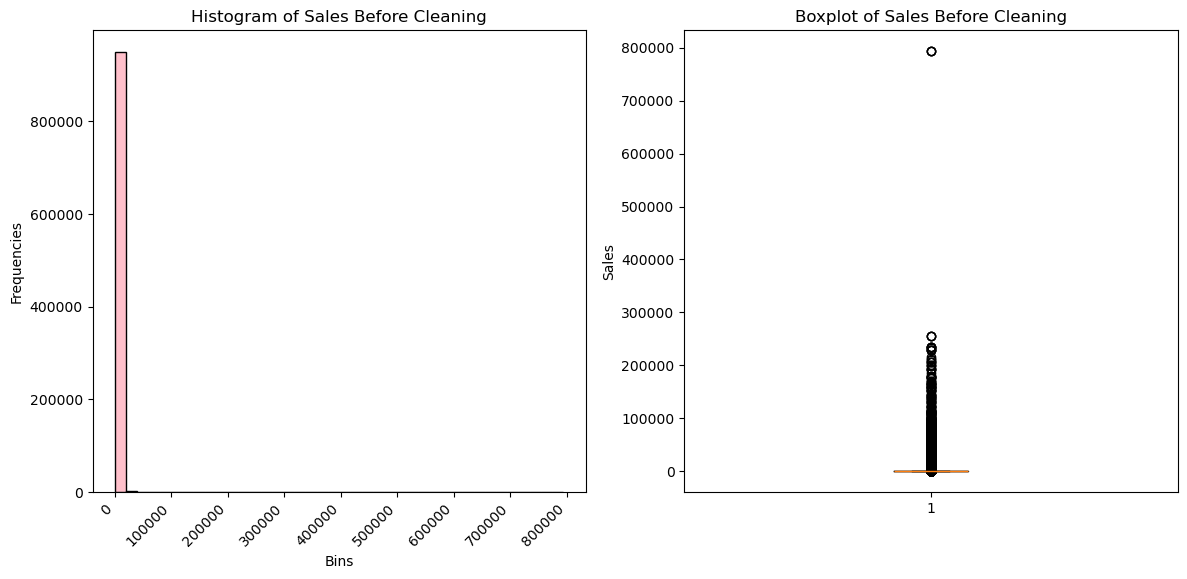

In [41]:
fig,ax = plt.subplots(1,2, figsize =(14,6))

plt.subplot(1,2,1)
plt.hist(lumina['sales'], bins = 40, edgecolor = 'black', color = 'pink')
plt.title('Histogram of Sales Before Cleaning')
plt.xlabel('Bins')
plt.ylabel('Frequencies')
plt.xticks(rotation = 45, ha= 'right', size = 10)

plt.subplot(1,2,2)
plt.boxplot(lumina['sales'])
plt.title('Boxplot of Sales Before Cleaning')
plt.ylabel('Sales')

In [42]:
# cleaning outliers by categorizing light_source
lumina['sales_clean'] = lumina['sales']
def clean_outlier(a):
    median = lumina.loc[(lumina['light_source']== a),'sales_clean'].median()
    qtl25 = lumina.loc[lumina['light_source']== a,'sales_clean'].quantile(0.25)
    qtl75 = lumina.loc[lumina['light_source']== a,'sales_clean'].quantile(0.75)
    iqr = qtl75 - qtl25
    lower = qtl25 - 1.5*iqr
    upper = qtl75 + 1.5*iqr
    lumina.loc[(lumina['light_source']== a)&(lumina['sales_clean'] > upper),'sales_clean'] =np.nan
    lumina.loc[(lumina['light_source']== a)&(lumina['sales_clean'] < lower),'sales_clean'] =np.nan
    lumina.loc[(lumina['light_source']== a),'sales_clean']=lumina.loc[(lumina['light_source']== a),'sales_clean'].fillna(median)

clean_outlier('LED')
clean_outlier('Traditional')
clean_outlier('Accessories')

Text(0, 0.5, 'Sales')

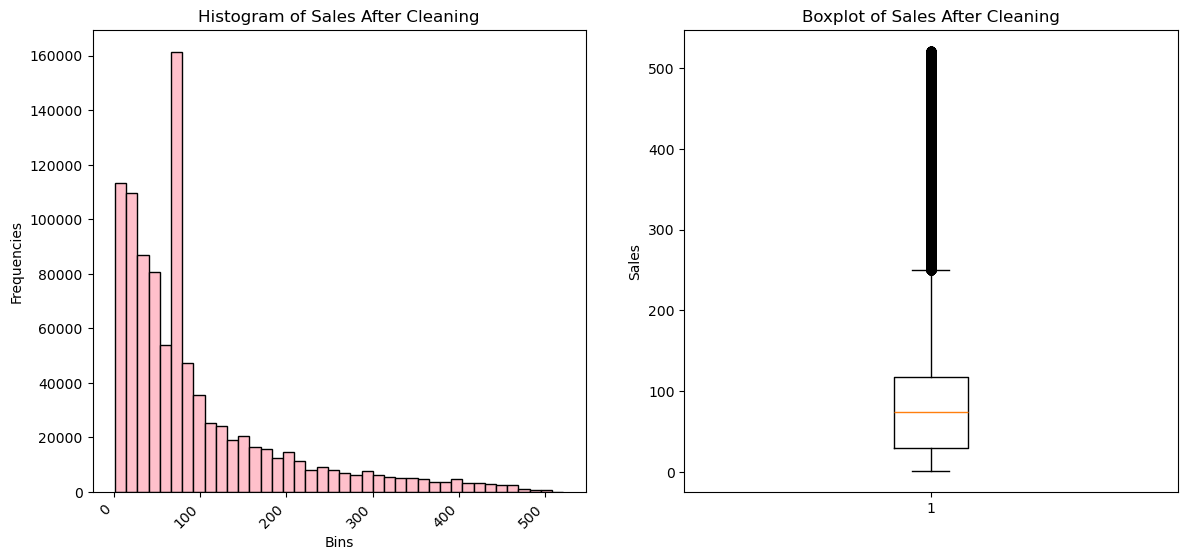

In [43]:
fig,ax = plt.subplots(1,2, figsize =(14,6))

plt.subplot(1,2,1)
plt.hist(lumina['sales_clean'], bins = 40, edgecolor = 'black', color = 'pink')
plt.title('Histogram of Sales After Cleaning')
plt.xlabel('Bins')
plt.ylabel('Frequencies')
plt.xticks(rotation = 45, ha= 'right', size = 10)

plt.subplot(1,2,2)
plt.boxplot(lumina['sales_clean'])
plt.title('Boxplot of Sales After Cleaning')
plt.ylabel('Sales')

In [44]:
lumina.to_csv('lumina_clean.csv', index=False)